<a href="https://colab.research.google.com/github/chtourouahm/project-Rock-or-Mine/blob/main/project_Rock_or_Mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Copy of sonar data.csv')
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


data coolection and data preprcecing

In [ ]:
data.shape

(207, 61)

In [ ]:
data.describe()#statistic

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050

In [ ]:
data['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [ ]:
data.groupby('R').mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.366140,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,0.174857,0.191936,0.226275,0.271093,0.310153,0.377156,0.418216,0.449785,0.466334,0.500443,0.541895,0.569937,0.614835,0.654790,0.668785,0.693296,0.687501,0.671741,0.632197,0.581957,0.533919,0.453610,0.440099,0.442461,0.451382,0.456648,0.414706,0.346151,0.311828,0.318511,0.287870,0.252015,0.211085,0.172523,0.141044,0.116724,0.094347,0.068812,0.038451,0.017644,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


cross_valivation 

In [ ]:
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

verificatioon de la performance du deux model

In [ ]:
cv=KFold(5)
cv1=ShuffleSplit(5,test_size=0.2)
print( 'LogisticRegression',cross_val_score(LogisticRegression(),x,y,cv=cv1))
print('RandomForestClassifier',cross_val_score(RandomForestClassifier(),x,y,cv=cv1))


LogisticRegression [0.76190476 0.78571429 0.83333333 0.71428571 0.71428571]
RandomForestClassifier [0.80952381 0.83333333 0.85714286 0.83333333 0.85714286]


In [ ]:
y=data['R']
x=data.drop('R',axis=1)
data=data['R'].replace(['R','M'],[0,1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=0)

In [ ]:
print(x.shape,x_test.shape)

(207, 60) (21, 60)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.6666666666666666

learning_curve pour savoir la seuil de rondement de model

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N,train_score,val_score=learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.1,1,100))

Text(0.5, 1.0, 'test_score(N)')

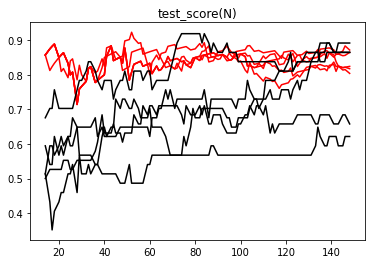

In [ ]:


plt.plot(N,train_score,color='red')
plt.title('train_score(N)')

plt.plot(N,val_score,color='black')
plt.title('test_score(N)')


learning curve pour le model1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.8095238095238095

In [ ]:
N,train_score,val_score=learning_curve(model1,x_train,y_train,train_sizes=np.linspace(0.1,1,20),cv=5)


Text(0.5, 1.0, 'test_score(N)')

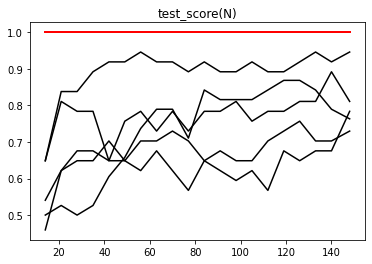

In [ ]:

plt.plot(N,train_score,color='red')
plt.title('train_score(N)')

plt.plot(N,val_score,color='black')
plt.title('test_score(N)')


accurecy x_train 

In [ ]:
x_train_prediction=model.predict(x_train)

In [ ]:
traning_data_accurecy=accuracy_score(x_train_prediction,y_train)

In [ ]:
traning_data_accurecy

0.8333333333333334

In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accurecy= accuracy_score(x_test_prediction ,y_test)

In [ ]:
print('accuracy on test data :',test_data_accurecy)

accuracy on test data : 0.6666666666666666


test une autre accurcy


In [ ]:
from sklearn.metrics import confusion_matrix ,precision_recall_curve


In [ ]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict_proba(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[[0.59087696 0.40912304]]
The object is a mine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':
